In [30]:
from sklearn import datasets
#from sklearn.utils import shuffle

import pandas as pd
import numpy as np
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data)
target = cancer.target
x_data = df.values
#st = df+ 
#st.head()
df.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, target, shuffle=True, test_size=0.20)

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
clf.predict_proba(cancer.data)[13]

array([ 0.18954161,  0.81045839])

In [34]:
# clf.predict(x_test).shape
# y_test.shape

# knn

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf1.fit(x_train,y_train)
clf1.score(x_test,y_test)

0.92105263157894735

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
x_axis = [] 
scores = []
for k in range(1,50,2): 
    x_axis.append(i)
    clf1 = KNeighborsClassifier(n_neighbors=k)
    clf1.fit(x_train,y_train)
    scores.append((cross_val_score(clf1,x_train,y_train,cv=10)).mean())
    
    

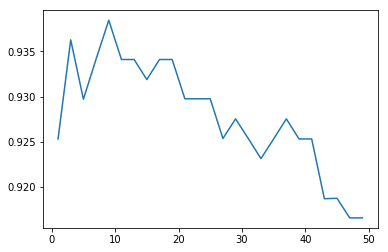

9

In [37]:
plt.plot(x_axis, scores)
plt.show()                                            
optimal_k = x_axis[scores.index(max(scores))]
optimal_k

# implementation of knn


In [38]:
y_train.shape

(455,)

In [43]:
from collections import defaultdict
    
def predict(x_train,x_test,y_train,k):
    
    y_pred = np.zeros(x_test.shape[0])
    d = []
    for i in range(0,len(x_test)):
        for j in range(0,len(x_train)):
            dist = ((x_test[i,:] - x_train[j,:])**2).sum()
            d.append((dist,j))
        d.sort()
    
    vote = defaultdict(int)
    for i in range(k):
        curr_class = y_train[d[i][1]]
        print(curr_class)
        vote[curr_class] = vote[curr_class] + 1
    print(vote.values())
    print(vote.keys())
    print(vote)
    max_value = max(vote.values())
    max_result = [key for key, value in vote.items() if value == max_value]
    print(max_result)
#     print(vote.keys[max(vote.items(), key= vote.get)]) 





In [44]:
predict(x_train,x_test,y_train,50)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
dict_values([49, 1])
dict_keys([1, 0])
defaultdict(<class 'int'>, {1: 49, 0: 1})
[1]


In [45]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,


# practice inbuilt logistic reg with iris


In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
target = iris.target
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
clf = LogisticRegression()
clf.fit(df,target)
clf.score(df,target)

0.95999999999999996

In [14]:
clf.predict_proba(df)[1]

array([  7.99706325e-01,   2.00263292e-01,   3.03825365e-05])

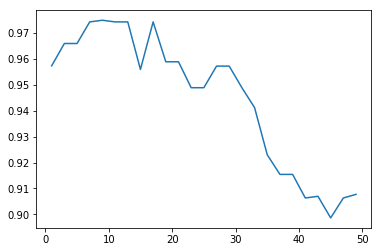

9

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df,target,test_size = 0.2)
clf1 = KNeighborsClassifier()
clf1.fit(x_train,y_train)
clf1.score(x_test,y_test)
x_axis = []
scores = []
for i in range(1,50,2): 
    x_axis.append(i)
    clf1 = KNeighborsClassifier(n_neighbors=i)
    clf1.fit(x_train,y_train)
    scores.append((cross_val_score(clf1,x_train,y_train,cv=10)).mean())
    
plt.plot(x_axis, scores)
plt.show()
optimal_k = x_axis[scores.index(max(scores))]
optimal_k
    